In [19]:
import pandas as pd
import numpy as np
# Load the raw data
fp = "D:/DTU/F3_2024/IntroML/Project1/SleepStudy/wine_data_fixed.csv"
df = pd.read_csv(fp)

# df standardise:
df = (df - df.mean()) / df.std()


y = df['Alcohol'].values
df = df.drop(columns=['Alcohol'])

#X = df.drop(columns=['Alcohol'])
X = df
X = X.values
print(X.shape)


print(y.shape)

# Headings
attributeNames = df.columns.tolist()

(177, 12)
(177,)


In [ ]:
y = y.reshape(-1,1)

print(y.shape)

(177, 1)


In [21]:
df.head()

,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,-0.500205,-0.822153,-2.493037,0.029098,0.571046,0.737544,-0.820810,-0.537052,-0.290307,0.405948,1.128497,0.968306
1,0.017969,1.104556,-0.274859,0.099649,0.810484,1.218189,-0.499919,2.139904,0.268966,0.318663,0.802303,1.397035
2,-0.348327,0.486555,-0.814416,0.946269,2.486555,1.468525,-0.981256,1.037628,1.181011,-0.423257,1.199408,2.333888
3,0.223452,1.831616,0.444550,1.299027,0.810484,0.667450,0.222086,0.407756,-0.316119,0.362306,0.461927,-0.032063
4,-0.518073,0.304790,-1.294022,0.875717,1.560726,1.368391,-0.179028,0.670203,0.729291,0.405948,0.348469,2.238614


X dataset (177, 12)
y dataset (177, 1)
Cross validation fold 1/5
Train indices: [  0   1   2   3   4   6   7   8  11  13  14  15  16  18  19  20  21  22
  23  25  26  28  29  30  32  33  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  61  63  64  65
  67  69  70  72  73  74  75  76  77  78  79  81  82  83  84  85  86  87
  89  91  92  94  95  96  97  98  99 101 102 103 105 106 107 108 109 110
 111 112 113 114 117 118 119 120 125 127 128 129 130 131 133 134 135 136
 137 138 139 140 143 144 146 147 148 149 150 151 152 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 171 172 173 174 175 176]
Test indices: [  5   9  10  12  17  24  27  31  34  35  60  62  66  68  71  80  88  90
  93 100 104 115 116 121 122 123 124 126 132 141 142 145 153 168 169 170]
Features no: 4

Cross validation fold 2/5
Train indices: [  2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  29  30  31  32  33  34  35  36

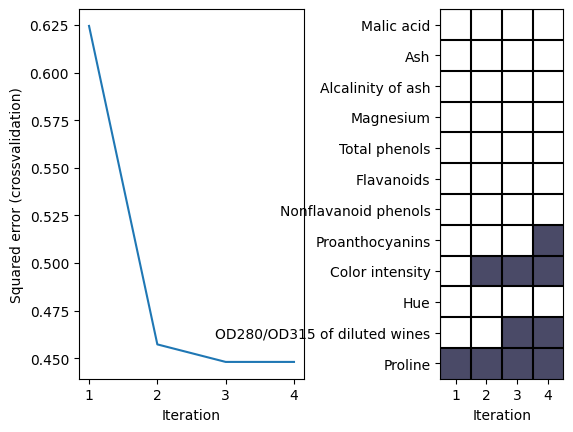

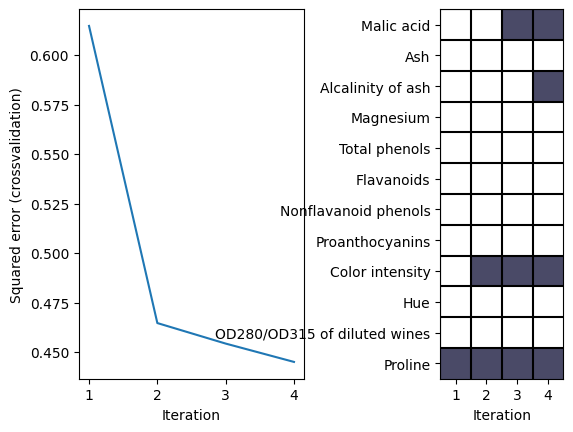

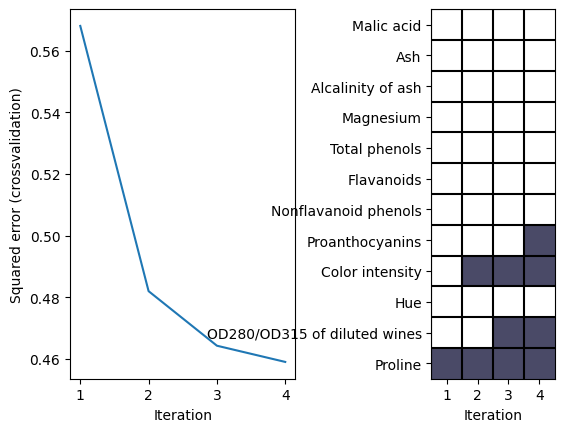

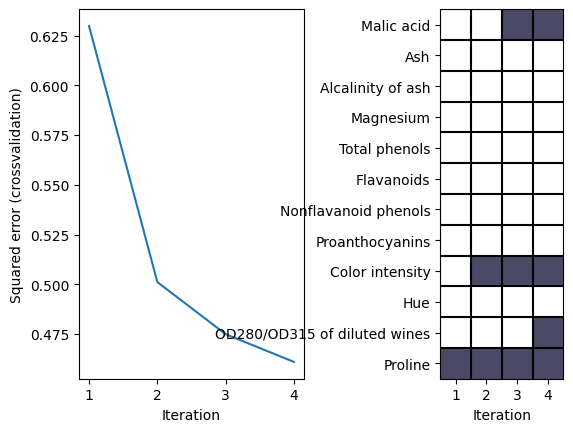

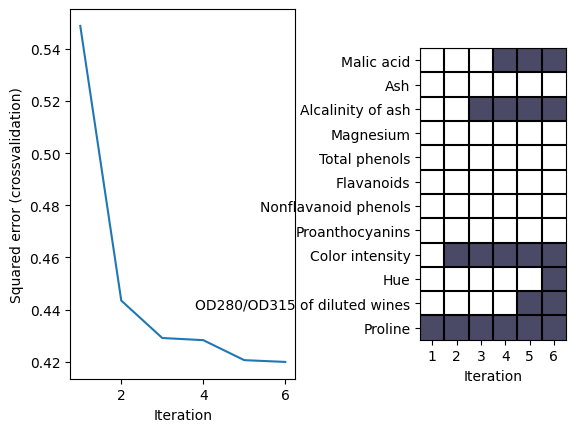

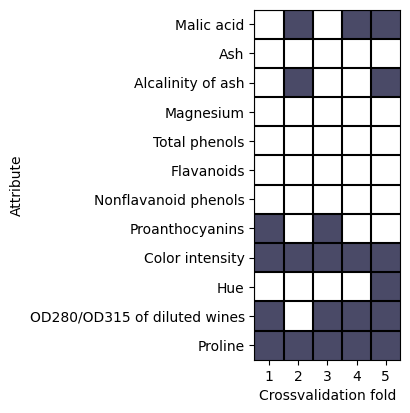

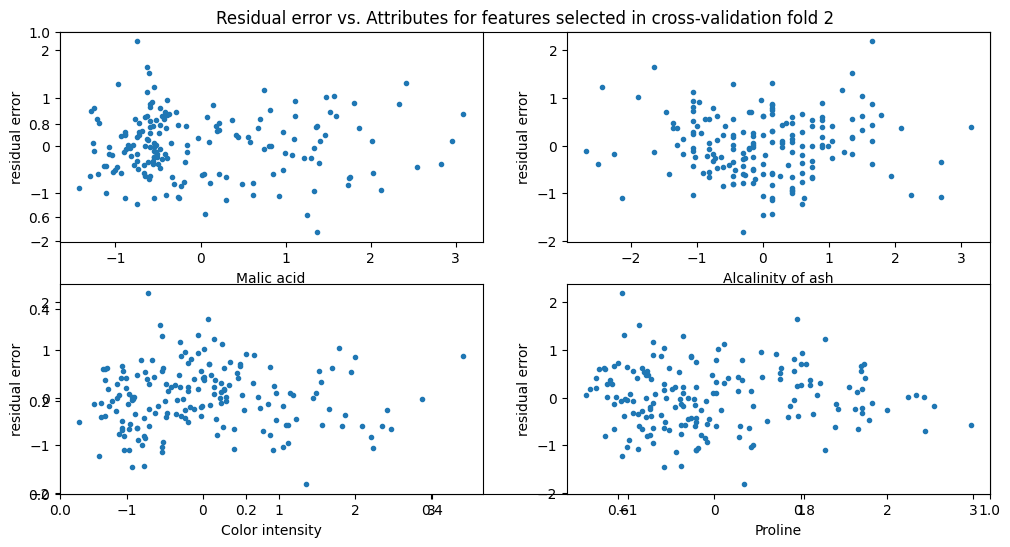

Ran Exercise 6.2.1


In [22]:
import importlib_resources
import numpy as np
import sklearn.linear_model as lm
from matplotlib.pyplot import clim, figure, plot, show, subplot, title, xlabel, ylabel
from scipy.io import loadmat
from sklearn import model_selection

from dtuimldmtools import bmplot, feature_selector_lr

#filename = importlib_resources.files("dtuimldmtools").joinpath("data/body.mat")
# Load data from matlab file
#mat_data = loadmat(filename)

#X = mat_data['X']
#y = mat_data['y'].squeeze()

print("X dataset", X.shape)
print("y dataset", y.shape)

#attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
N, M = X.shape


## Crossvalidation
# Create crossvalidation partition for evaluation
K = 5
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))

k=0
for train_index, test_index in CV.split(X):
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    internal_cross_validation = 10
    
    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum()/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum()/y_test.shape[0]

    # Compute squared error with all features selected (no feature selection)
    m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Compute squared error with feature subset selection
    textout = ''
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation,display=textout)
    
    Features[selected_features,k] = 1
    # .. alternatively you could use module sklearn.feature_selection
    if len(selected_features) == 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        m = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs[k] = np.square(y_train-m.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs[k] = np.square(y_test-m.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
    
        figure(k)
        subplot(1,2,1)
        plot(range(1,len(loss_record)), loss_record[1:])
        xlabel('Iteration')
        ylabel('Squared error (crossvalidation)')    
        
        subplot(1,3,3)
        bmplot(attributeNames, range(1,features_record.shape[1]), -features_record[:,1:])
        clim(-1.5,0)
        xlabel('Iteration')

    print('Cross validation fold {0}/{1}'.format(k+1,K))
    print('Train indices: {0}'.format(train_index))
    print('Test indices: {0}'.format(test_index))
    print('Features no: {0}\n'.format(selected_features.size))

    k+=1


# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_fs.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test_fs.sum())/Error_test_nofeatures.sum()))

figure(k)
subplot(1,3,2)
bmplot(attributeNames, range(1,Features.shape[1]+1), -Features)
clim(-1.5,0)
xlabel('Crossvalidation fold')
ylabel('Attribute')


# Inspect selected feature coefficients effect on the entire dataset and
# plot the fitted model residual error as function of each attribute to
# inspect for systematic structure in the residual

f=2 # cross-validation fold to inspect
ff=Features[:,f-1].nonzero()[0]
if len(ff) == 0:
    print('\nNo features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
else:
    m = lm.LinearRegression(fit_intercept=True).fit(X[:,ff], y)
    
    y_est= m.predict(X[:,ff])
    residual=y-y_est
    
    figure(k+1, figsize=(12,6))
    title('Residual error vs. Attributes for features selected in cross-validation fold {0}'.format(f))
    for i in range(0,len(ff)):
       subplot(2, int( np.ceil(len(ff)/2)), i+1)
       plot(X[:,ff[i]],residual,'.')
       xlabel(attributeNames[ff[i]])
       ylabel('residual error')
    
    
show()

print('Ran Exercise 6.2.1')

In [10]:
def PlotGenErr(testErr, k, lambdas):
    genErr = testErr * 1/k
    figure(k, figsize=(12,8))
    plot(genErr, lambdas)
    show()

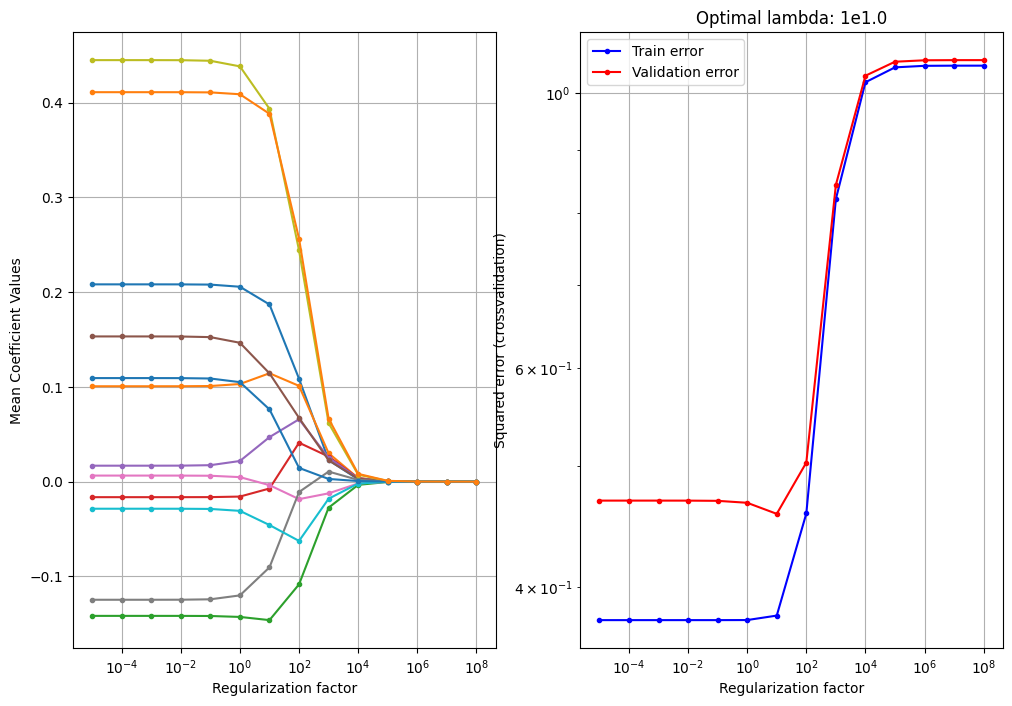

Linear regression without feature selection:
- Training error: 0.3973984909660352
- Test error:     0.49539755802502794
- R^2 train:     0.5984467089525596
- R^2 test:     0.4624731647060081

Regularized linear regression:
- Training error: 0.4002832445623666
- Test error:     0.48686275393178846
- R^2 train:     0.5955317952656659
- R^2 test:     0.47173378006386874

Weights in last fold:
         Offset            0.03
     Malic acid            0.19
            Ash            0.11
Alcalinity of ash           -0.15
      Magnesium           -0.01
  Total phenols            0.05
     Flavanoids            0.12
Nonflavanoid phenols            -0.0
Proanthocyanins           -0.09
Color intensity             0.4
            Hue           -0.04
OD280/OD315 of diluted wines            0.08
        Proline            0.39
Ran Exercise 8.1.1


In [11]:
# exercise 8.1.1

import importlib_resources
import numpy as np
import sklearn.linear_model as lm
from matplotlib.pylab import (
    figure,
    grid,
    legend,
    loglog,
    semilogx,
    show,
    subplot,
    title,
    xlabel,
    ylabel,
)
from scipy.io import loadmat
from sklearn import model_selection

from dtuimldmtools import rlr_validate

#filename = importlib_resources.files("dtuimldmtools").joinpath("data/body.mat")


#mat_data = loadmat(filename)
#X = mat_data["X"]
#y = mat_data["y"].squeeze()
#attributeNames = [name[0] for name in mat_data["attributeNames"][0]]
N, M = X.shape

# Add offset attribute
X = np.concatenate((np.ones((X.shape[0], 1)), X), 1)
attributeNames = ["Offset"] + attributeNames
M = M + 1

## Crossvalidation
# Create crossvalidation partition for evaluation
K = 5
CV = model_selection.KFold(K, shuffle=True)
# CV = model_selection.KFold(K, shuffle=False)

# Values of lambda
lambdas = np.power(10.0, range(-5, 9))

# Initialize variables
# T = len(lambdas)
Error_train = np.empty((K, 1))
Error_test = np.empty((K, 1))
Error_train_rlr = np.empty((K, 1))
Error_test_rlr = np.empty((K, 1))
Error_train_nofeatures = np.empty((K, 1))
Error_test_nofeatures = np.empty((K, 1))
w_rlr = np.empty((M, K))
mu = np.empty((K, M - 1))
sigma = np.empty((K, M - 1))
w_noreg = np.empty((M, K))

k = 0
for train_index, test_index in CV.split(X, y):
    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    internal_cross_validation = 10

    (
        opt_val_err,
        opt_lambda,
        mean_w_vs_lambda,
        train_err_vs_lambda,
        test_err_vs_lambda,
    ) = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)

    # Standardize outer fold based on training set, and save the mean and standard
    # deviations since they're part of the model (they would be needed for
    # making new predictions) - for brevity we won't always store these in the scripts
    mu[k, :] = np.mean(X_train[:, 1:], 0)
    sigma[k, :] = np.std(X_train[:, 1:], 0)

    X_train[:, 1:] = (X_train[:, 1:] - mu[k, :]) / sigma[k, :]
    X_test[:, 1:] = (X_test[:, 1:] - mu[k, :]) / sigma[k, :]

    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train

    # Compute mean squared error without using the input data at all
    Error_train_nofeatures[k] = (
        np.square(y_train - y_train.mean()).sum(axis=0) / y_train.shape[0]
    )
    Error_test_nofeatures[k] = (
        np.square(y_test - y_test.mean()).sum(axis=0) / y_test.shape[0]
    )

    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(M)
    lambdaI[0, 0] = 0  # Do no regularize the bias term
    w_rlr[:, k] = np.linalg.solve(XtX + lambdaI, Xty).squeeze()

    # Compute mean squared error with regularization with optimal lambda
    Error_train_rlr[k] = (
        np.square(y_train - X_train @ w_rlr[:, k]).sum(axis=0) / y_train.shape[0]
    )
    Error_test_rlr[k] = (
        np.square(y_test - X_test @ w_rlr[:, k]).sum(axis=0) / y_test.shape[0]
    )

    # Estimate weights for unregularized linear regression, on entire training set
    w_noreg[:, k] = np.linalg.solve(XtX, Xty).squeeze()
    # Compute mean squared error without regularization
    Error_train[k] = (
        np.square(y_train - X_train @ w_noreg[:, k]).sum(axis=0) / y_train.shape[0]
    )
    Error_test[k] = (
        np.square(y_test - X_test @ w_noreg[:, k]).sum(axis=0) / y_test.shape[0]
    )
    # OR ALTERNATIVELY: you can use sklearn.linear_model module for linear regression:
    # m = lm.LinearRegression().fit(X_train, y_train)
    # Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    # Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Display the results for the last cross-validation fold
    if k == K - 1:
        figure(k, figsize=(12, 8))
        subplot(1, 2, 1)
        semilogx(lambdas, mean_w_vs_lambda.T[:, 1:], ".-")  # Don't plot the bias term
        xlabel("Regularization factor")
        ylabel("Mean Coefficient Values")
        grid()
        # You can choose to display the legend, but it's omitted for a cleaner
        # plot, since there are many attributes
        # legend(attributeNames[1:], loc='best')

        subplot(1, 2, 2)
        title("Optimal lambda: 1e{0}".format(np.log10(opt_lambda)))
        loglog(
            lambdas, train_err_vs_lambda.T, "b.-", lambdas, test_err_vs_lambda.T, "r.-"
        )
        xlabel("Regularization factor")
        ylabel("Squared error (crossvalidation)")
        legend(["Train error", "Validation error"])
        grid()

        #PlotGenErr(test_err_vs_lambda, k, lambdas)


    # To inspect the used indices, use these print statements
    # print('Cross validation fold {0}/{1}:'.format(k+1,K))
    # print('Train indices: {0}'.format(train_index))
    # print('Test indices: {0}\n'.format(test_index))

    k += 1

show()




# Display results
print("Linear regression without feature selection:")
print("- Training error: {0}".format(Error_train.mean()))
print("- Test error:     {0}".format(Error_test.mean()))
print(
    "- R^2 train:     {0}".format(
        (Error_train_nofeatures.sum() - Error_train.sum())
        / Error_train_nofeatures.sum()
    )
)
print(
    "- R^2 test:     {0}\n".format(
        (Error_test_nofeatures.sum() - Error_test.sum()) / Error_test_nofeatures.sum()
    )
)
print("Regularized linear regression:")
print("- Training error: {0}".format(Error_train_rlr.mean()))
print("- Test error:     {0}".format(Error_test_rlr.mean()))
print(
    "- R^2 train:     {0}".format(
        (Error_train_nofeatures.sum() - Error_train_rlr.sum())
        / Error_train_nofeatures.sum()
    )
)
print(
    "- R^2 test:     {0}\n".format(
        (Error_test_nofeatures.sum() - Error_test_rlr.sum())
        / Error_test_nofeatures.sum()
    )
)

print("Weights in last fold:")
for m in range(M):
    print("{:>15} {:>15}".format(attributeNames[m], np.round(w_rlr[m, -1], 2)))

print("Ran Exercise 8.1.1")



# ANN Stuff

In [ ]:
# Retain the splits so that we can re-run the models on the same data

import importlib_resources
import matplotlib.pyplot as plt
import numpy as np
import torch
from scipy import stats
from scipy.io import loadmat
from sklearn import model_selection

# Double Cross-Validation values:
K1 = 5
K2 = 5

CV = model_selection.KFold(K, shuffle=True, random_state=123)
splits = list(CV.split(X, y)) #list because the generatozr can be exhausted.


# For ANN:

h_values = [1, 2, 5, 10, 25, 50]
h_count = len(h_values)
n_replicates = 1        
max_iter = 5000
loss_fn = torch.nn.MSELoss() 

Eval_ANN = np.empty((K2, h_count)) # init correct size array for test errors of ANN
Eval_K1final_ANN = []

In [ ]:
# DOUBLE Cross-validation:

from dtuimldmtools import draw_neural_net, train_neural_net

#k1 = 0
for k1, (par_index, test_index) in enumerate(splits):
    print("\nCrossvalidation fold: {0}/{1}".format(k1 + 1, K1))

    # Extract training and test set for current CV fold
    X_par = X[par_index,:]
    y_par = y[par_index]
    X_par_ANN = torch.Tensor(X[par_index,:])
    y_par_ANN =torch.Tensor(y[par_index])

    # Testing models for ANN returns a tensor:
    X_test_ANN = torch.Tensor(X[test_index, :])
    y_test_ANN = torch.Tensor(y[test_index])

    # CV2
    CV2 = model_selection.KFold(n_splits=K2,shuffle=True)

    for k2, (train_index, test_index) in enumerate(CV2.split(X_par, y_par)):
        print("\nCrossvalidation fold (2): {0}/{1}".format(k2 + 1, K2))

        X_train_ANN = torch.Tensor(X[train_index, :])
        y_train_ANN = torch.Tensor(y[train_index])

        X_val = X[test_index,:] # for the train_neural_net().net() fn
        y_val = y[test_index]    

        X_val_ANN = torch.Tensor(X[test_index,:])
        y_val_ANN = torch.Tensor(y[test_index])

        X_train_RLR = X[train_index, :]
        y_train_RLR = y[train_index]

        X_val_RLR = X[test_index,:]
        y_val_RLR = y[test_index]

        # For ANN including all hidden layer list
        for h_i, h in enumerate(h_values):
            model = lambda: torch.nn.Sequential(
            torch.nn.Linear(M, h),  # M features to n_hidden_units
            torch.nn.Tanh(),  # 1st transfer function,
            torch.nn.Linear(h, 1),  # n_hidden_units to 1 output neuron
            # no final tranfer function, i.e. "linear output"
            )

            # Train the net on training data
            net, final_loss, learning_curve = train_neural_net(
                model,
                loss_fn,
                X=X_train_ANN,
                y=y_train_ANN,
                n_replicates=n_replicates,
                max_iter=max_iter,
            )
            # Determine estimated class labels for test set
            y_test_est_ANN = net(X_val_ANN) #replaces X_test kept ref for sanity

            # Error per hidden layer:
            se = (y_test_est_ANN.float() - y_val_ANN.float()) ** 2  # squared error
            mse = (sum(se).type(torch.float) / len(y_val)).data.numpy()  # mean
            Eval_ANN[k2, h_i] = mse


            #----------------Linear Regression-------------

            # Standardize outer fold based on training set, and save the mean and standard
            mu[k, :] = np.mean(X_train_RLR[:, 1:], 0)
            sigma[k, :] = np.std(X_train_RLR[:, 1:], 0)

            X_train_RLR[:, 1:] = (X_train_RLR[:, 1:] - mu[k, :]) / sigma[k, :]
            X_val_RLR[:, 1:] = (X_val_RLR[:, 1:] - mu[k, :]) / sigma[k, :]

            Xty = X_train_RLR.T @ y_train_RLR
            XtX = X_train_RLR.T @ X_train_RLR
            
            # Following function to get the optimal lambda val for RLR:
            (
                opt_val_err,
                opt_lambda,
                mean_w_vs_lambda,
                train_err_vs_lambda,
                test_err_vs_lambda,
            ) = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)

        #print("\n\tBest loss: {}\n".format(final_loss)) #Loss checker

    # Select the best h-value for ANN:
    ANN_h_mse_general_e = np.mean(Eval_ANN, axis=0)
    optimal_h = h_values[np.argmin(ANN_h_mse_general_e)]

    # Re-run the ANN now with our known optimal h value:
    model = lambda: torch.nn.Sequential(
            torch.nn.Linear(M, optimal_h),  # M features to n_hidden_units
            torch.nn.Tanh(),  # 1st transfer function,
            torch.nn.Linear(optimal_h, 1),  # n_hidden_units to 1 output neuron
            )
    
    net, final_loss, learning_curve = train_neural_net(
                model,
                loss_fn,
                X=X_par_ANN,
                y=y_par_ANN,
                n_replicates=n_replicates,
                max_iter=max_iter,
            )
    # Determine estimated class labels for test set now we use the test data.
    y_test_est_ANN = net(X_test_ANN)

    # Same as in K2 we find MSE:
    se = (y_test_est_ANN.float() - y_val_ANN.float()) ** 2  # squared error
    mse = (sum(se).type(torch.float) / len(y_val)).data.numpy()  # mean
    Eval_K1final_ANN[k1] =  mse


print("Mean error for each h value over the 5 folds: ", ANN_h_mse_general_e)
print("The optimal h value = ", optimal_h)
print("Mean sq error for each fold of K1: ", Eval_K1final_ANN)


Crossvalidation fold: 1/5

Crossvalidation fold (2): 1/5

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	0.45001632	0.001017636
		2000	0.3306396	8.89557e-05
		3000	0.3117525	3.689873e-05
		4000	0.30461746	1.310975e-05
		5000	0.30199963	5.4275524e-06
		Final loss:
		5000	0.30199963	5.4275524e-06

	Replicate: 1/1
		Iter	Loss			Rel. loss


C:\Users\Mikus\AppData\Local\Temp\ipykernel_36032\3443218450.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Eval_ANN[k2, h_i] = mse


		1000	0.2959039	0.0002435732
		2000	0.2292585	9.5276824e-05
		3000	0.22145578	7.468834e-06
		4000	0.22047795	2.9737628e-06
		5000	0.22000673	1.6255289e-06
		Final loss:
		5000	0.22000673	1.6255289e-06

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	0.24166763	0.0005456374
		2000	0.11786512	0.0007398633
		3000	0.07387369	0.0002520756
		4000	0.06102987	0.00016771101
		5000	0.053441644	0.000101902166
		Final loss:
		5000	0.053441644	0.000101902166

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	0.17102718	0.0013105067
		2000	0.03080972	0.0018744977
		3000	0.0060647787	0.0015927432
		4000	0.0016662078	0.0010378653
		5000	0.00051954464	0.0014239626
		Final loss:
		5000	0.00051954464	0.0014239626

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	0.008644556	0.003764692
		2000	3.614915e-05	0.006991213
		3000	3.618361e-08	0.0076062744
		4000	3.028517e-12	0.0026456732
		5000	4.3504e-14	0.08113783
		Final loss:
		5000	4.3504e-14	0.08113783

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	0.0282827

### Test finding the lowest h_parameter:

In [60]:
print(ANN_h_mse_general_e)

[0.59198644 0.63872939 1.04351132 1.24792261 0.91396648 0.88070828]


Training model of type:

Sequential(
  (0): Linear(in_features=12, out_features=20, bias=True)
  (1): Tanh()
  (2): Linear(in_features=20, out_features=1, bias=True)
)


Crossvalidation fold: 1/5

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	0.060152378	0.0025334132
		2000	0.0049337437	0.0029374156
		3000	0.0002896602	0.0028430945
		4000	1.0730561e-05	0.0038614124
		5000	8.099851e-08	0.0060753115
		6000	2.843363e-06	0.57503575
		7000	5.0946664e-12	0.06637677
		8000	2.1922976e-07	1.2162277
		9000	5.5682968e-08	0.45916075
		10000	1.4133167e-05	0.07973396
		Final loss:
		10000	1.4133167e-05	0.07973396

	Best loss: 1.4133166587271262e-05


Crossvalidation fold: 2/5

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	0.15830112	0.0012595886
		2000	0.048500217	0.0010741049
		3000	0.012021684	0.0017969408
		4000	0.0016612232	0.0020315622
		5000	0.00014968227	0.0028322968
		6000	5.9917934e-06	0.0036388552
		7000	7.255211e-08	0.0055846497
		8000	5.991038e-07	0.44909024
		9000	1.9929374e-11	0.1129

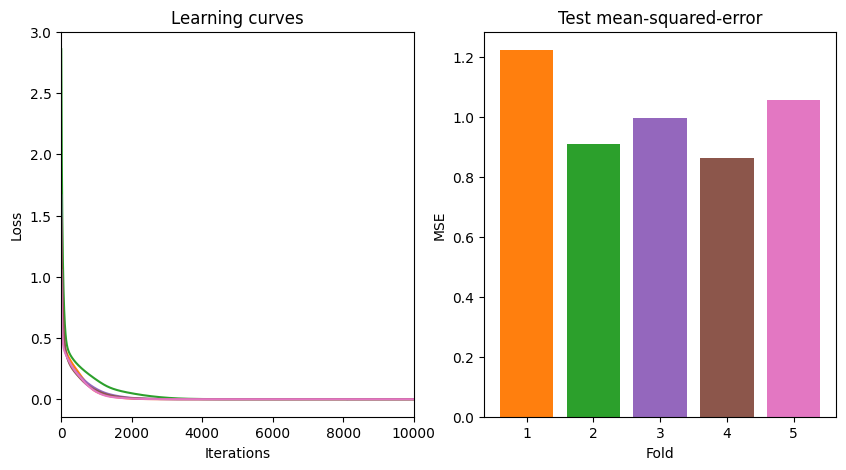

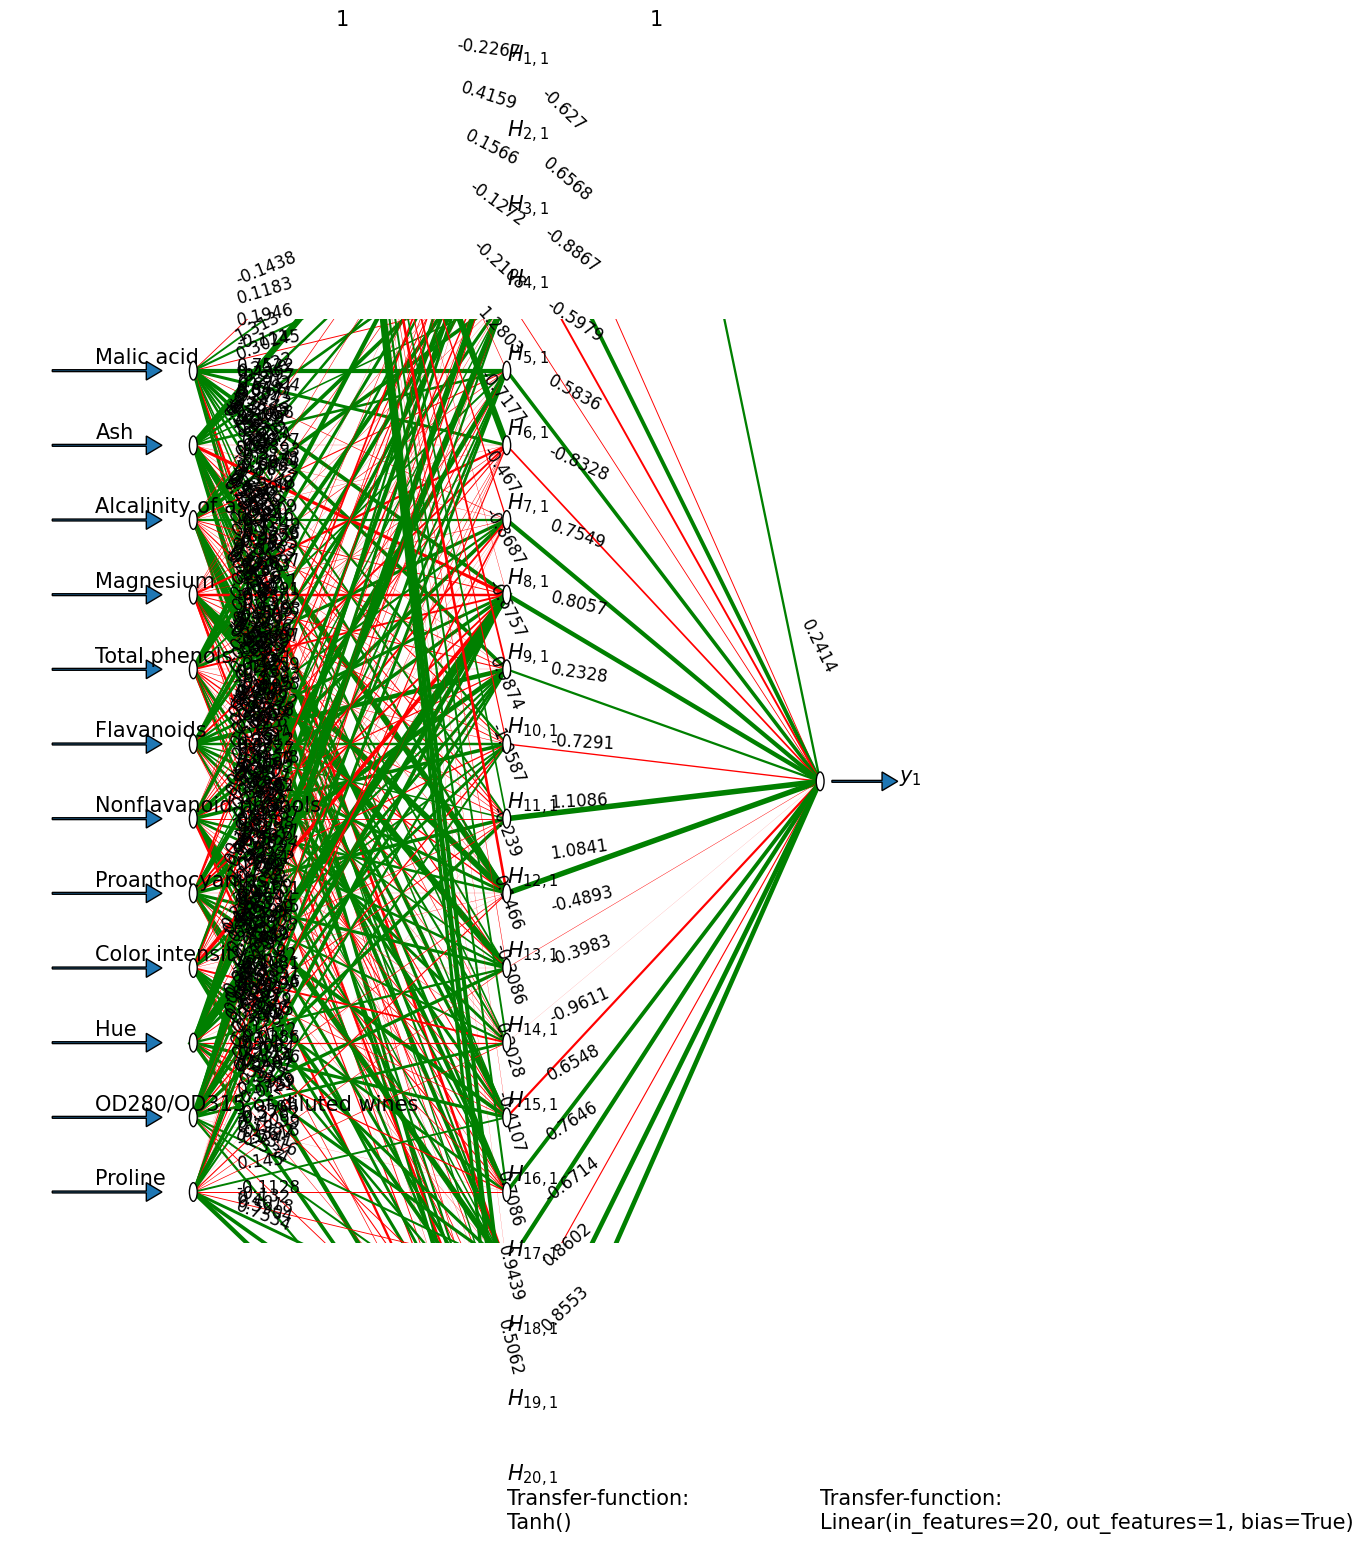


Estimated generalization error, RMSE: 1.0049999952316284


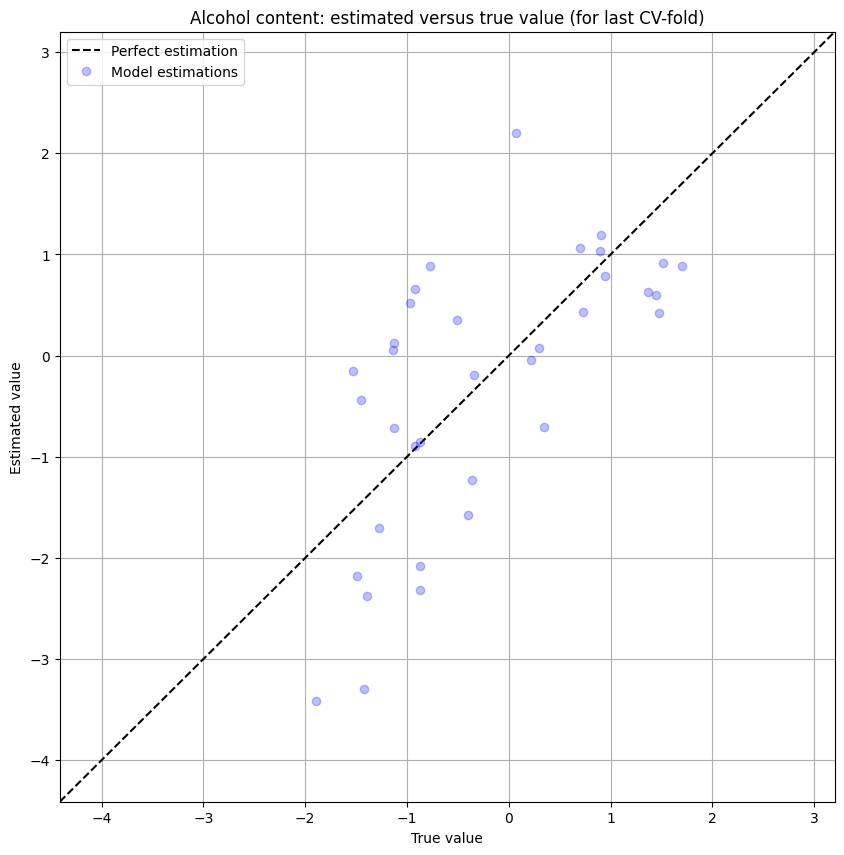

Ran Exercise 8.2.5


In [48]:
# exercise 8.2.6
import importlib_resources
import matplotlib.pyplot as plt
import numpy as np
import torch
from scipy import stats
from scipy.io import loadmat
from sklearn import model_selection

from dtuimldmtools import draw_neural_net, train_neural_net

N, M = X.shape
C = 2

# Normalize data
X = stats.zscore(X)

## Normalize and compute PCA (change to True to experiment with PCA preprocessing)
do_pca_preprocessing = False
if do_pca_preprocessing:
    Y = stats.zscore(X, 0)
    U, S, V = np.linalg.svd(Y, full_matrices=False)
    V = V.T
    # Components to be included as features
    k_pca = 3
    X = X @ V[:, :k_pca]
    N, M = X.shape


# Parameters for neural network classifier
n_hidden_units = 20  # number of hidden units
n_replicates = 1  # number of networks trained in each k-fold
max_iter = 10000

# K-fold crossvalidation
#K = 5  # only three folds to speed up this example
#CV = model_selection.KFold(K, shuffle=True, random_state=123)

# Setup figure for display of learning curves and error rates in fold
summaries, summaries_axes = plt.subplots(1, 2, figsize=(10, 5))
# Make a list for storing assigned color of learning curve for up to K=10
color_list = [
    "tab:orange",
    "tab:green",
    "tab:purple",
    "tab:brown",
    "tab:pink",
    "tab:gray",
    "tab:olive",
    "tab:cyan",
    "tab:red",
    "tab:blue",
]
# Define the model
model = lambda: torch.nn.Sequential(
    torch.nn.Linear(M, n_hidden_units),  # M features to n_hidden_units
    torch.nn.Tanh(),  # 1st transfer function,
    torch.nn.Linear(n_hidden_units, 1),  # n_hidden_units to 1 output neuron
    # no final tranfer function, i.e. "linear output"
)
loss_fn = torch.nn.MSELoss()  # notice how this is now a mean-squared-error loss

print("Training model of type:\n\n{}\n".format(str(model())))
errors = []  # make a list for storing generalizaition error in each loop
for k, (train_index, test_index) in enumerate(splits):
    print("\nCrossvalidation fold: {0}/{1}".format(k + 1, K))

    # Extract training and test set for current CV fold, convert to tensors
    X_train = torch.Tensor(X[train_index, :])
    y_train = torch.Tensor(y[train_index])
    X_test = torch.Tensor(X[test_index, :])
    y_test = torch.Tensor(y[test_index])

    # Train the net on training data
    net, final_loss, learning_curve = train_neural_net(
        model,
        loss_fn,
        X=X_train,
        y=y_train,
        n_replicates=n_replicates,
        max_iter=max_iter,
    )

    print("\n\tBest loss: {}\n".format(final_loss))

    # Determine estimated class labels for test set
    y_test_est = net(X_test)

    # Determine errors and errors
    se = (y_test_est.float() - y_test.float()) ** 2  # squared error
    mse = (sum(se).type(torch.float) / len(y_test)).data.numpy()  # mean
    errors.append(mse)  # store error rate for current CV fold

    # Display the learning curve for the best net in the current fold
    (h,) = summaries_axes[0].plot(learning_curve, color=color_list[k])
    h.set_label("CV fold {0}".format(k + 1))
    summaries_axes[0].set_xlabel("Iterations")
    summaries_axes[0].set_xlim((0, max_iter))
    summaries_axes[0].set_ylabel("Loss")
    summaries_axes[0].set_title("Learning curves")

# Display the MSE across folds
summaries_axes[1].bar(
    np.arange(1, K + 1), np.squeeze(np.asarray(errors)), color=color_list
)
summaries_axes[1].set_xlabel("Fold")
summaries_axes[1].set_xticks(np.arange(1, K + 1))
summaries_axes[1].set_ylabel("MSE")
summaries_axes[1].set_title("Test mean-squared-error")

print("Diagram of best neural net in last fold:")
weights = [net[i].weight.data.numpy().T for i in [0, 2]]
biases = [net[i].bias.data.numpy() for i in [0, 2]]
tf = [str(net[i]) for i in [1, 2]]
draw_neural_net(weights, biases, tf, attribute_names=attributeNames)

# Print the average classification error rate
print(
    "\nEstimated generalization error, RMSE: {0}".format(
        round(np.sqrt(np.mean(errors)), 4)
    )
)

# When dealing with regression outputs, a simple way of looking at the quality
# of predictions visually is by plotting the estimated value as a function of
# the true/known value - these values should all be along a straight line "y=x",
# and if the points are above the line, the model overestimates, whereas if the
# points are below the y=x line, then the model underestimates the value
plt.figure(figsize=(10, 10))
y_est = y_test_est.data.numpy()
y_true = y_test.data.numpy()
axis_range = [np.min([y_est, y_true]) - 1, np.max([y_est, y_true]) + 1]
plt.plot(axis_range, axis_range, "k--")
plt.plot(y_true, y_est, "ob", alpha=0.25)
plt.legend(["Perfect estimation", "Model estimations"])
plt.title("Alcohol content: estimated versus true value (for last CV-fold)")
plt.ylim(axis_range)
plt.xlim(axis_range)
plt.xlabel("True value")
plt.ylabel("Estimated value")
plt.grid()

plt.show()

print("Ran Exercise 8.2.5")
